In [1]:
import pickle
import pandas as pd
import yaml
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('../src')
from portfolio_opt_methods import mv_portfolio

In [2]:
import os

def print_files_in_directory(directory):
    for filename in os.listdir(directory):
        if os.path.isfile(os.path.join(directory, filename)):
            print(filename)

In [3]:
path = '../raw/FinanceCPT/returns'
# print_files_in_directory(path)

In [4]:
files = ['manyinputs_returns800012000.csv',
         'random-rels_20_1_3_returns30007000.csv',
         'random-rels_20_1A_returns30007000.csv',
         'random-rels_20_1B_returns30007000.csv',
         'random-rels_20_1C_returns30007000.csv',
         'random-rels_20_1D_returns30007000.csv',
         'random-rels_20_1E_returns30007000.csv',
         'random-rels_40_1_3_returns30007000.csv',
         'random-rels_40_1_returns30007000.csv']

In [5]:
file = files[0]

In [6]:
df = pd.read_csv(f'{path}/{file}', header = None)
df.columns = ['R'+str(x+1) for x in df.columns]
df += 25 # for all price values positive 

In [7]:
df

,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,...,R16,R17,R18,R19,R20,R21,R22,R23,R24,R25
0,24.712720,26.110390,25.138862,24.839614,25.331015,25.576051,25.567163,25.536858,25.315942,25.772121,...,25.713635,25.730157,25.088199,25.695549,25.952064,25.220598,25.435783,25.289880,25.299785,25.459749
1,25.406096,25.446268,25.083800,25.075963,25.187601,24.245173,25.860852,25.575704,24.767699,25.137087,...,24.759750,24.906628,25.218775,25.184677,24.141789,24.582859,24.442097,24.149735,24.767231,24.694580
2,24.920634,24.881173,24.475990,24.566011,24.983561,25.490750,25.392299,24.592024,24.778009,24.669187,...,24.362635,25.215811,24.625438,24.784944,25.185652,24.580355,24.038931,24.665640,24.838268,25.338257
3,23.486264,24.920505,24.370582,24.463085,24.987753,23.985987,24.659007,23.960774,24.477572,24.179297,...,24.371343,25.179167,24.495285,24.441035,24.960781,24.424121,25.003022,25.456024,25.112273,25.915084
4,25.044545,25.013248,25.202148,25.314706,24.823952,25.841822,25.330104,25.680550,24.943190,25.546451,...,24.795217,25.123285,25.249370,25.963897,25.376620,24.937406,25.034994,25.352220,25.219445,25.549210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,25.305815,25.916183,25.297052,25.638372,25.515355,26.510381,26.164379,25.456004,25.613698,25.445132,...,25.608066,24.905247,25.292539,24.357396,25.377156,24.860145,25.001518,24.565689,25.590493,25.353710
3996,27.172325,27.169870,27.088810,26.724695,27.139766,27.808525,27.580389,27.349119,27.328791,27.479952,...,27.321130,26.529919,26.639185,26.651089,26.579262,25.816192,26.529823,26.039369,25.673956,26.604068
3997,25.132175,25.169827,25.126604,25.015428,25.333476,24.424712,25.168901,25.847375,25.349911,25.406883,...,25.448413,25.852699,25.601905,25.757952,26.148814,25.725830,25.394153,26.169412,25.719158,26.211588
3998,22.478014,23.964243,22.660168,23.549921,23.127107,23.129780,23.548040,23.321088,23.116268,22.573016,...,23.028995,23.477617,23.497968,23.353219,23.165296,23.426613,23.867394,23.857681,23.176012,22.586324


In [8]:
start_date = '2011-01-01' # if 30007000, else if 800012000 - 2022-01-01
dates = pd.date_range(start=start_date, periods=df.shape[0])
df['Date'] = dates
df.set_index('Date', inplace=True)

In [9]:
df

,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,...,R16,R17,R18,R19,R20,R21,R22,R23,R24,R25
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-01,24.712720,26.110390,25.138862,24.839614,25.331015,25.576051,25.567163,25.536858,25.315942,25.772121,...,25.713635,25.730157,25.088199,25.695549,25.952064,25.220598,25.435783,25.289880,25.299785,25.459749
2011-01-02,25.406096,25.446268,25.083800,25.075963,25.187601,24.245173,25.860852,25.575704,24.767699,25.137087,...,24.759750,24.906628,25.218775,25.184677,24.141789,24.582859,24.442097,24.149735,24.767231,24.694580
2011-01-03,24.920634,24.881173,24.475990,24.566011,24.983561,25.490750,25.392299,24.592024,24.778009,24.669187,...,24.362635,25.215811,24.625438,24.784944,25.185652,24.580355,24.038931,24.665640,24.838268,25.338257
2011-01-04,23.486264,24.920505,24.370582,24.463085,24.987753,23.985987,24.659007,23.960774,24.477572,24.179297,...,24.371343,25.179167,24.495285,24.441035,24.960781,24.424121,25.003022,25.456024,25.112273,25.915084
2011-01-05,25.044545,25.013248,25.202148,25.314706,24.823952,25.841822,25.330104,25.680550,24.943190,25.546451,...,24.795217,25.123285,25.249370,25.963897,25.376620,24.937406,25.034994,25.352220,25.219445,25.549210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-09,25.305815,25.916183,25.297052,25.638372,25.515355,26.510381,26.164379,25.456004,25.613698,25.445132,...,25.608066,24.905247,25.292539,24.357396,25.377156,24.860145,25.001518,24.565689,25.590493,25.353710
2021-12-10,27.172325,27.169870,27.088810,26.724695,27.139766,27.808525,27.580389,27.349119,27.328791,27.479952,...,27.321130,26.529919,26.639185,26.651089,26.579262,25.816192,26.529823,26.039369,25.673956,26.604068
2021-12-11,25.132175,25.169827,25.126604,25.015428,25.333476,24.424712,25.168901,25.847375,25.349911,25.406883,...,25.448413,25.852699,25.601905,25.757952,26.148814,25.725830,25.394153,26.169412,25.719158,26.211588


In [10]:
df.to_pickle('../cleaned/random-rels_40_1_3_returns30007000.pkl')

In [11]:
df.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2021-12-04', '2021-12-05', '2021-12-06', '2021-12-07',
               '2021-12-08', '2021-12-09', '2021-12-10', '2021-12-11',
               '2021-12-12', '2021-12-13'],
              dtype='datetime64[ns]', name='Date', length=4000, freq=None)

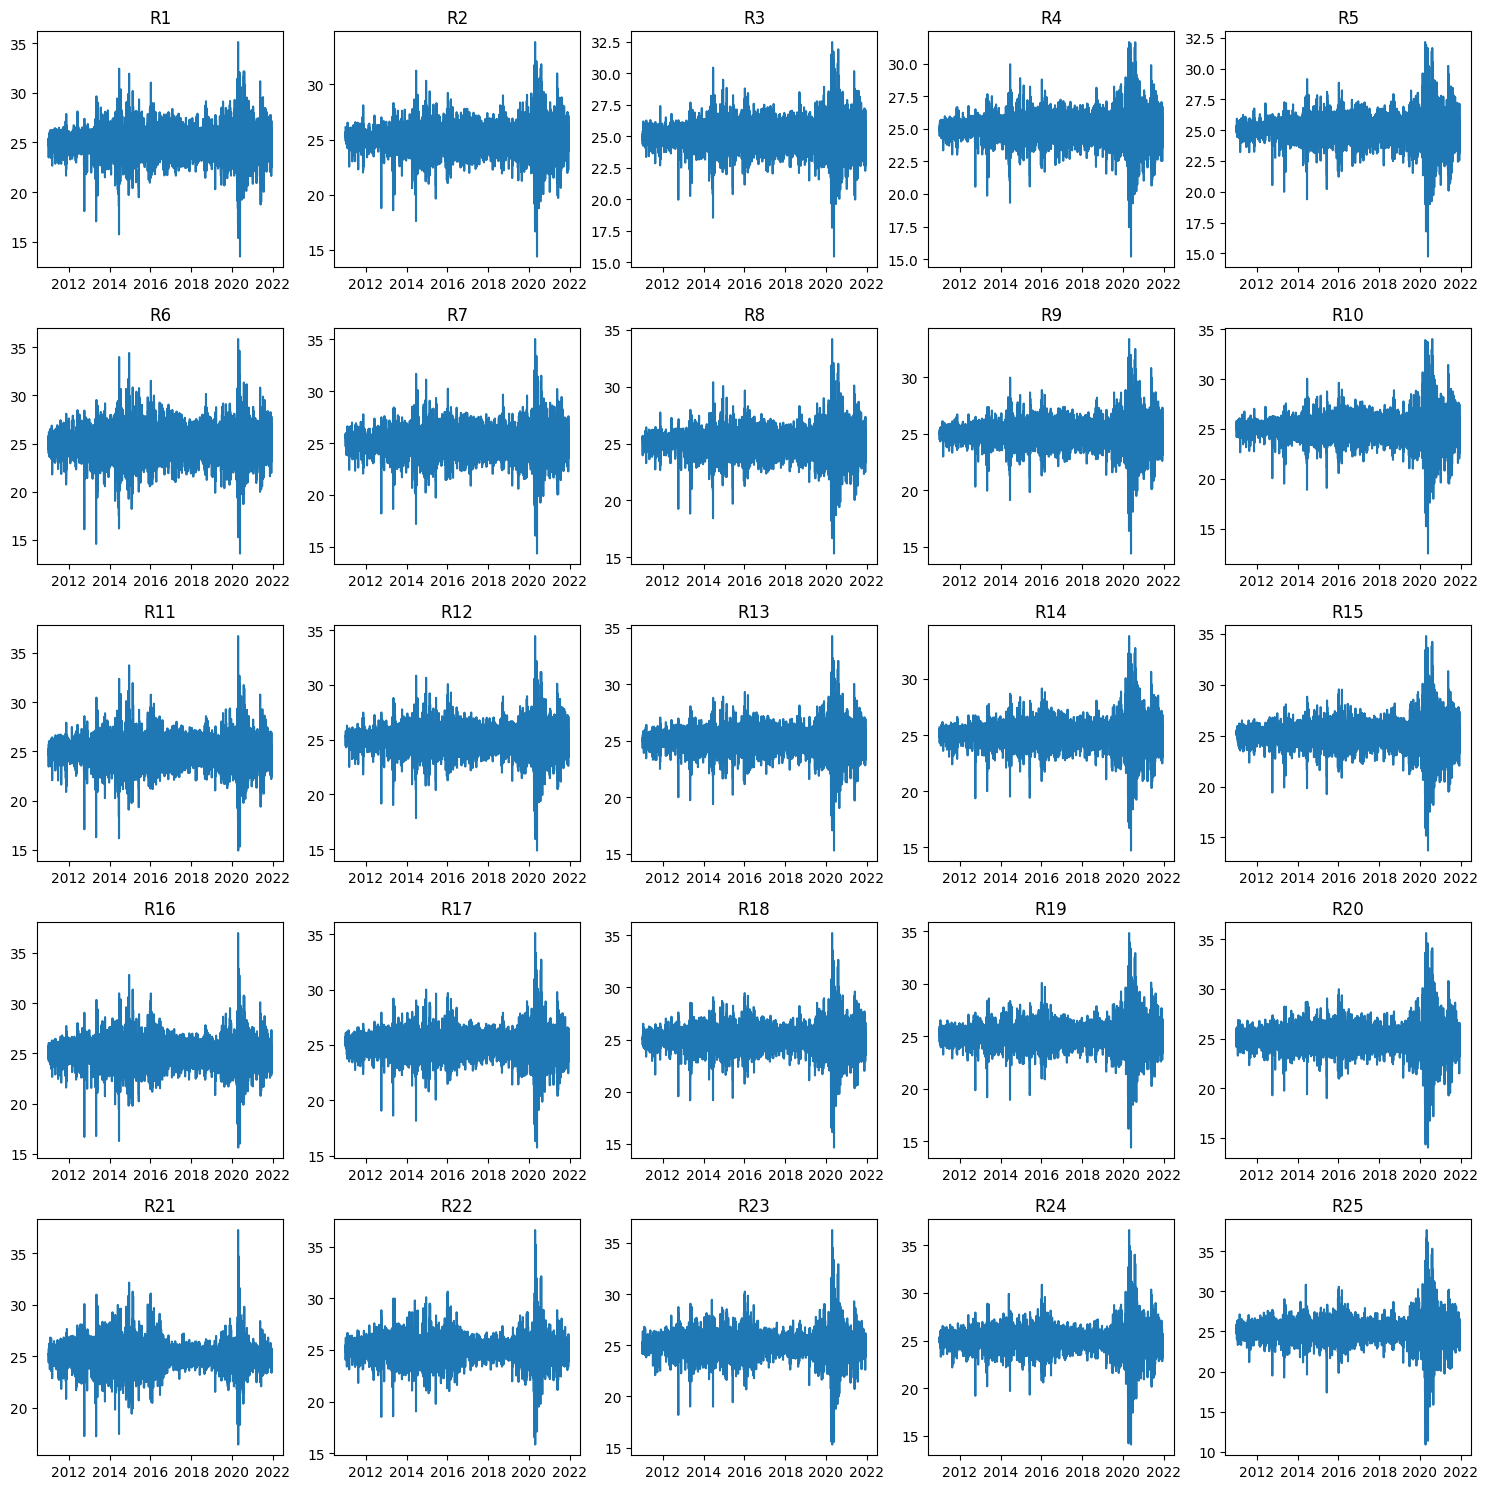

In [12]:
fig, axs = plt.subplots(round(df.shape[1] / 5), 5, figsize=(15, 15)) # Creating a 5x5 subplots
axs = axs.ravel() # to iterate over the 5x5 matrix easily

for i in range(df.shape[1]): # Iterate through each subplot
    axs[i].plot(df.iloc[:, i]) # Plot the i-th column time series on the i-th subplot
    axs[i].set_title(df.columns[i]) # Set the title to the column name

plt.tight_layout() # To prevent overlapping labels
plt.show() # Show the plot